   Channel  Counts
0        0       9
1        1       0
2        2       2
3        3       0
4        4       0


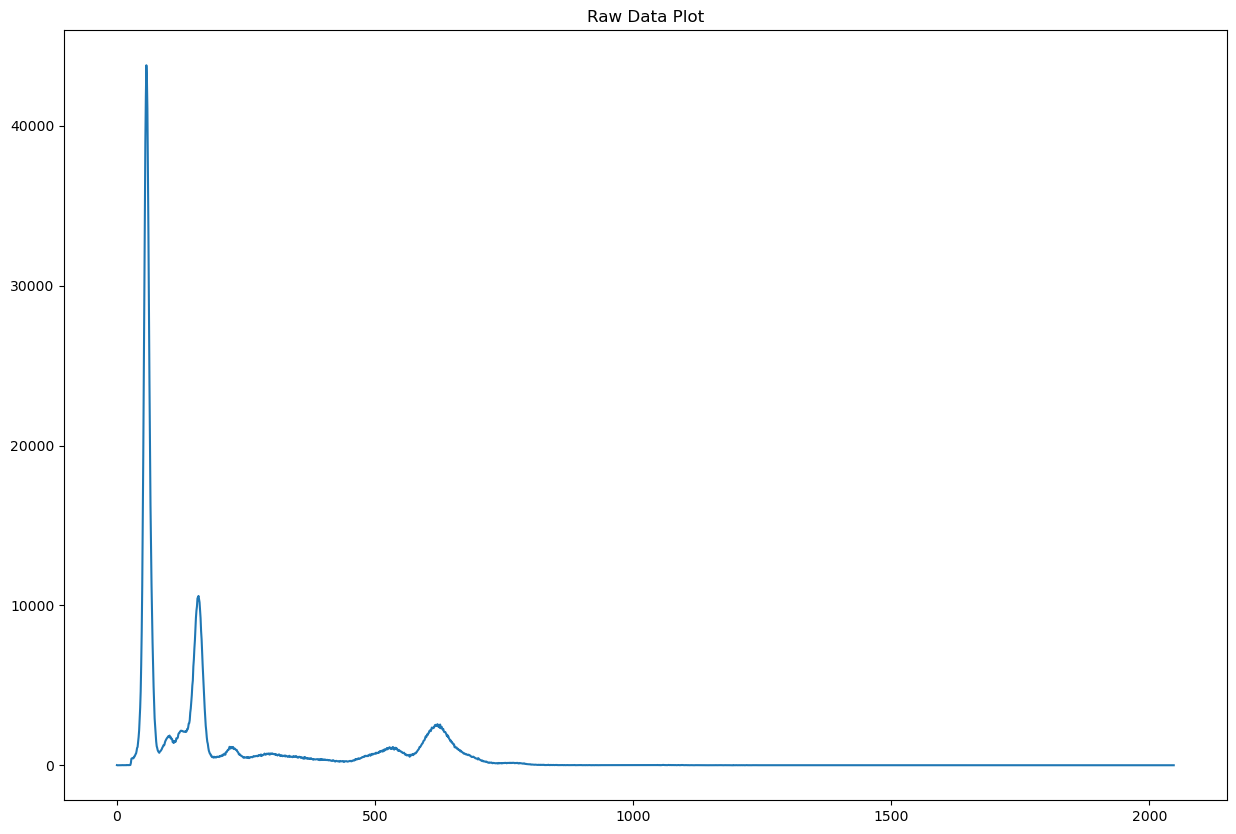

In [25]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class


##############
# Import data
##############

df_Ba_133 = pd.read_csv("Ba_133.csv") # create pandas dataframe
print(df_Ba_133.head()) # print first 5 rows


##############
# Plot data
##############

x_Ba_133 = df_Ba_133["Channel"] # grab column
y_Ba_133 = df_Ba_133["Counts"] # grab column
plt.figure(figsize=(15,10))
plt.xlabel("")
plt.ylabel("")
plt.title("Raw Data Plot")
plt.plot(x_Ba_133, y_Ba_133)
plt.show()

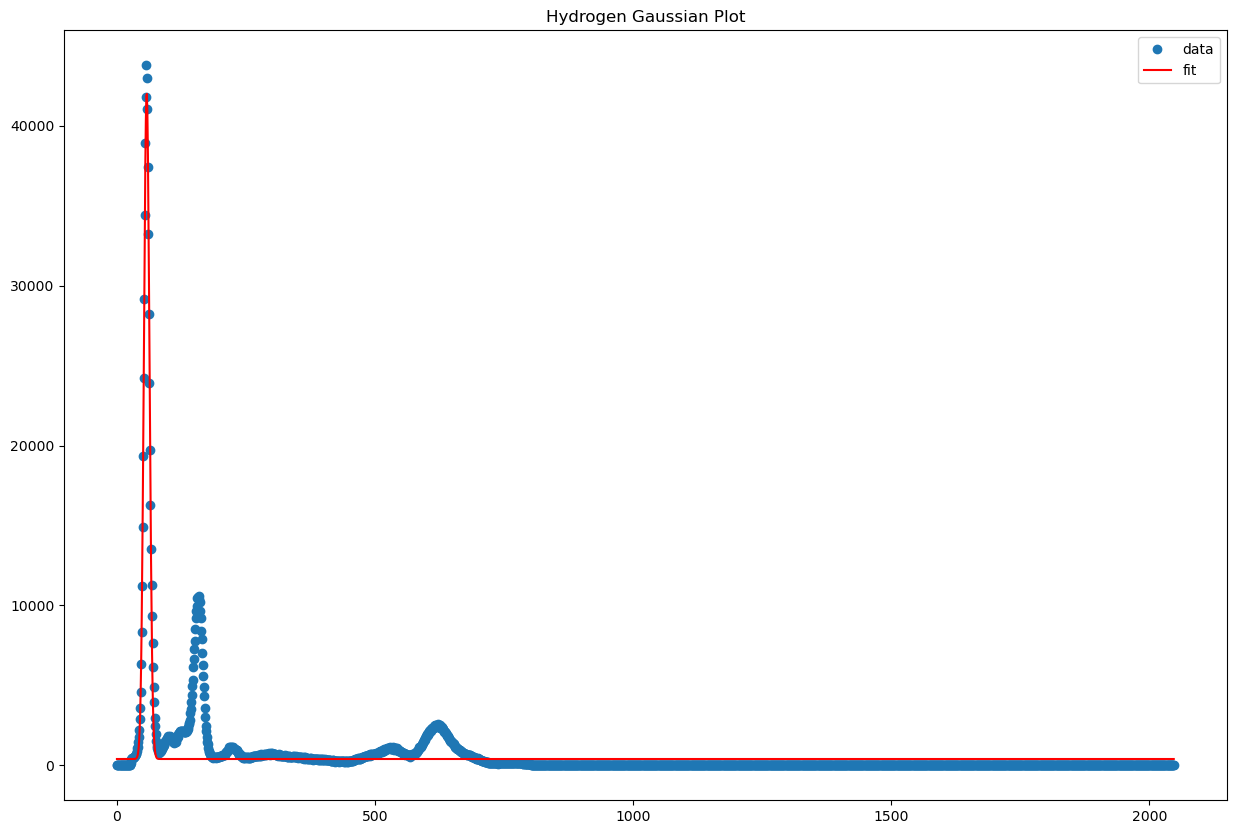

In [22]:
########################
# Input constant values
########################

a_Ba_133 = 41000 # amplitude                   
mean_Ba_133 = 60 # middle of graph                 
h_Ba_133 = 0 # vertical shift                  
sigma_Ba_133 = 390 # width displacement


################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x_Ba_133, a_Ba_133, mean_Ba_133, sigma_Ba_133, h_Ba_133):
    fit = a_Ba_133*np.exp((-(x_Ba_133-mean_Ba_133)**2)/(2*sigma_Ba_133**2)) + h_Ba_133
    return fit


#####################
# Fit the data using
# curve fit class
#####################

popt_Ba_133, pcov_Ba_133 = curve_fit(gaus, x_Ba_133, y_Ba_133, p0=[a_Ba_133, mean_Ba_133, sigma_Ba_133, h_Ba_133]) # solves for a, mean, sigma, h
y_Ba_133_fit = gaus(x_Ba_133, *popt_Ba_133) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.figure(figsize=(15,10))
plt.plot(x_Ba_133, y_Ba_133, 'o', label="data")
plt.plot(x_Ba_133, y_Ba_133_fit, 'r-', label='fit')
# plt.xlabel("Wavelength (nm)")
# plt.ylabel("Intesity (I)")
plt.title("Hydrogen Gaussian Plot")
plt.legend()
plt.show()

In [23]:
#####################
# Print fit data
# Print uncertainty
#####################
print("Fit Amplitude: ", popt_Ba_133[0],
      "\n Fit Mean: ", popt_Ba_133[1],
      "\n Fit Sigma (distance from mean to sides): ", popt_Ba_133[2],
      "\n Fit Height: ", popt_Ba_133[3])

print("\n Uncertainty matrix (uncertainties lie along diagonal): \n", pcov_Ba_133)

Fit Amplitude:  41721.49287104631 
 Fit Mean:  57.589923656857614 
 Fit Sigma (distance from mean to sides):  5.434095067712415 
 Fit Height:  392.3880970183989

 Uncertainty matrix (uncertainties lie along diagonal): 
 [[ 1.64941038e+05  2.25868334e-06 -1.42308520e+01 -3.70314546e+02]
 [ 2.25868334e-06  3.72475423e-03 -2.94646357e-10 -3.82795143e-09]
 [-1.42308520e+01 -2.94646357e-10  3.74252215e-03 -9.64630368e-02]
 [-3.70314546e+02 -3.82795143e-09 -9.64630368e-02  5.23703858e+02]]
